In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras

### Split Data into train, val, test
Val and Test make up about 1/6 of the data each
This portion should only be ran once

In [3]:
data = []
with open("F:\\Users\\Daniel\\Machine Learning Work\\Baseball work\\Game Log Data\\BaseballData.txt", "r") as dataFile:
    for line in dataFile:
        data.append(line)
print(len(data))

48555


In [4]:
testSize = 8000
valSize = 8000
trainSize = len(data) - testSize - valSize

random.shuffle(data)

trainData = data[0:trainSize]
valData = data[trainSize: trainSize + valSize]
testData = data[trainSize + valSize :]
print(len(trainData))
print(len(valData))
print(len(testData))

with open("F:\\Users\\Daniel\\Machine Learning Work\\Baseball work\\ML Data\\train.txt", "w") as trainFile:
    for line in trainData:
        trainFile.write(line)
        
with open("F:\\Users\\Daniel\\Machine Learning Work\\Baseball work\\ML Data\\val.txt", "w") as valFile:
    for line in valData:
        valFile.write(line)
        
with open("F:\\Users\\Daniel\\Machine Learning Work\\Baseball work\\ML Data\\test.txt", "w") as testFile:
    for line in testData:
        testFile.write(line)

32555
8000
8000


### Read/Load the data and normalize

In [24]:
def normalizePitcherData(data):
    for i in range(len(data)):
        #note normalizing here puts most values around the -1 to 1 range but many fields don't strictly follow this
        if(data[i][0] != 0):
            data[i][1:26] = data[i][1:26]/data[i][0] #what percentage of pitched games this happened / how many times per pitched game
        data[i][0] = data[i][0]/162 #what percentage of games the player pitches in
        #26,27,28,29 don't need to be changed
    return data
    
def normalizeBatterData(data):
    for i in range(len(data)):
        #note normalizing here puts most values around the -1 to 1 range but many fields don't strictly follow this
        if(data[i][1] != 0):
            data[i][2:19] = data[i][2:19]/data[i][1] #get average per at bat
        if(data[i][0] != 0):
            data[i][1] = data[i][1]/data[i][0] #avr. bats per batted game
        data[i][0] = data[i][0]/162 #shows what percent of games the player batts in
        #19,20,21,22 don't need to be changed
    return data

def getDataFromFile(fileName):
    fileData=np.loadtxt(fileName, delimiter=',') 
    [N,dim]=np.shape(fileData) #set up matrix from file
    
    dataX = np.zeros((N, dim))
    dataY = np.zeros((N))
    
    dataX = fileData[:, 0:dim - 1]
    dataY[:] = fileData[:, dim - 1]
    
    startIndex = 0
    #format of dataX:
    #home pitcher data (30 fields)
    dataX[:, startIndex:startIndex + 30] = normalizePitcherData(dataX[:, startIndex:startIndex + 30])
    startIndex = startIndex + 30
    #home batter 1 (23 fields)
    #home batter 2 (23 fields)
    #...
    #home batter 9 (23 fields)
    for i in range(9):
        dataX[:, startIndex:startIndex + 23] = normalizeBatterData(dataX[:, startIndex:startIndex + 23])
        startIndex = startIndex + 23
    
    #away pitcher data (30 fields)
    dataX[:, startIndex:startIndex + 30] = normalizePitcherData(dataX[:, startIndex:startIndex + 30])
    startIndex = startIndex + 30
    #away batter 1 (23 fields)
    #away batter 2 (23 fields)
    #...
    #away batter 9 (23 fields)
    for i in range(9):
        dataX[:, startIndex:startIndex + 23] = normalizeBatterData(dataX[:, startIndex:startIndex + 23])
        startIndex = startIndex + 23
    
    #for pitcher data: divide all fields by 162 to normalize
    return dataX, dataY
    
trainFileName = "F:\\Users\\Daniel\\Machine Learning Work\\Baseball work\\ML Data\\train.txt"
valFileName = "F:\\Users\\Daniel\\Machine Learning Work\\Baseball work\\ML Data\\val.txt"
testFileName = "F:\\Users\\Daniel\\Machine Learning Work\\Baseball work\\ML Data\\test.txt"

trainX, trainY = getDataFromFile(trainFileName)
valX, valY = getDataFromFile(valFileName)
testX, testY = getDataFromFile(testFileName)#

print(np.shape(trainX))

(32555, 474)


### Setup NN model

In [27]:
regParam = keras.regularizers.l2(.000001) #create regularization parameter
# ctrl + / to remove block comment
model = tf.keras.Sequential([
        keras.layers.Dense(units=np.shape(trainX)[1], activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=600, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=800, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=1000, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=800, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=400, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=200, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=100, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=25, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=1, activation='sigmoid')
    ])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

historyData = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=100, verbose=1)

Epoch 1/100
1018/1018 [==============================] - 54s 51ms/step - loss: 0.7001 - accuracy: 0.5393 - val_loss: 0.6914 - val_accuracy: 0.5430001 - accuracy: 0.
Epoch 2/100
1018/1018 [==============================] - 59s 58ms/step - loss: 0.6895 - accuracy: 0.5479 - val_loss: 0.6814 - val_accuracy: 0.5785
Epoch 3/100
1018/1018 [==============================] - 61s 60ms/step - loss: 0.6879 - accuracy: 0.5485 - val_loss: 0.6837 - val_accuracy: 0.5774
Epoch 4/100
1018/1018 [==============================] - 53s 52ms/step - loss: 0.6847 - accuracy: 0.5597 - val_loss: 0.6836 - val_accuracy: 0.5614
Epoch 5/100
1018/1018 [==============================] - 53s 52ms/step - loss: 0.6816 - accuracy: 0.5720 - val_loss: 0.6853 - val_accuracy: 0.5449
Epoch 6/100
1018/1018 [==============================] - 53s 52ms/step - loss: 0.6788 - accuracy: 0.5727 - val_loss: 0.6741 - val_accuracy: 0.5881
Epoch 7/100
1018/1018 [==============================] - 53s 52ms/step - loss: 0.6779 - accuracy: 0.

1018/1018 [==============================] - 49s 48ms/step - loss: 0.6540 - accuracy: 0.6000 - val_loss: 0.6791 - val_accuracy: 0.5840
Epoch 57/100
1018/1018 [==============================] - 53s 52ms/step - loss: 0.6536 - accuracy: 0.6001 - val_loss: 0.6738 - val_accuracy: 0.5882
Epoch 58/100
1018/1018 [==============================] - 55s 54ms/step - loss: 0.6508 - accuracy: 0.6122 - val_loss: 0.6734 - val_accuracy: 0.5836
Epoch 59/100
1018/1018 [==============================] - 58s 57ms/step - loss: 0.6546 - accuracy: 0.6038 - val_loss: 0.6854 - val_accuracy: 0.5726
Epoch 60/100
1018/1018 [==============================] - 57s 56ms/step - loss: 0.6535 - accuracy: 0.6061 - val_loss: 0.6713 - val_accuracy: 0.5899
Epoch 61/100
1018/1018 [==============================] - 49s 48ms/step - loss: 0.6507 - accuracy: 0.6067 - val_loss: 0.6749 - val_accuracy: 0.5856
Epoch 62/100
1018/1018 [==============================] - 50s 49ms/step - loss: 0.6514 - accuracy: 0.6093 - val_loss: 0.6754 

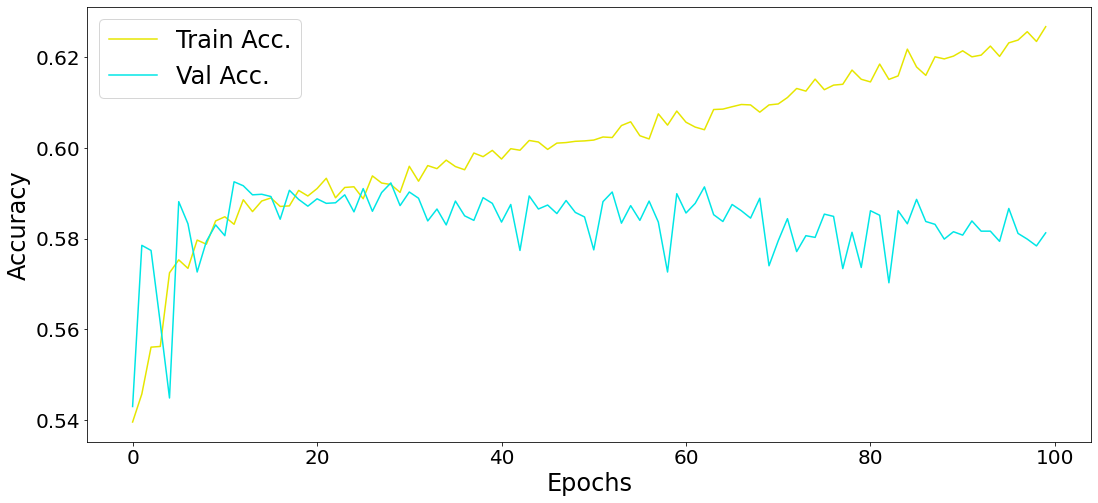

In [87]:
eIn = historyData.history["accuracy"]
eOut = historyData.history["val_accuracy"]

fig, ax = plt.subplots(figsize=(18,8))

ax.plot(eIn, color=(.9,.9,0), label="Train Acc.")
ax.plot(eOut, color=(0,.9,.9), label="Val Acc.")

ax.legend(fontsize=24)
ax.set_xlabel("Epochs", fontsize=24)
ax.set_ylabel("Accuracy", fontsize=24)

ax.tick_params(axis='both', labelsize=20)

In [21]:
lamdaList = [.000001] #[10, 1, .1, .05, .01, .005, .001, .0005, .00001, 0]
eInList = []
eOutList = []
for lamda in lamdaList:
    regParam = keras.regularizers.l2(lamda) #create regularization parameter
    
    modelInter = tf.keras.Sequential([
            keras.layers.Dense(units=np.shape(trainX)[1], activation='relu', kernel_regularizer=regParam),
            keras.layers.Dense(units=600, activation='linear', kernel_regularizer=regParam),
            keras.layers.Dense(units=800, activation='linear', kernel_regularizer=regParam),
            keras.layers.Dense(units=1000, activation='linear', kernel_regularizer=regParam),
            keras.layers.Dense(units=800, activation='linear', kernel_regularizer=regParam),
            keras.layers.Dense(units=400, activation='linear', kernel_regularizer=regParam),
            keras.layers.Dense(units=200, activation='linear', kernel_regularizer=regParam),
            keras.layers.Dense(units=100, activation='linear', kernel_regularizer=regParam),
            keras.layers.Dense(units=25, activation='linear', kernel_regularizer=regParam),
            keras.layers.Dense(units=1, activation='sigmoid')
        ])

    epochCount = 50
    print("For lamda=" + str(lamda) + ": ")
    eIn, eOut = runModel(trainX, trainY, valX, valY, modelInter, epochCount, verbose=1)
    eInList.append(eIn[-1]) #training error
    eOutList.append(eOut[-1]) #validation error
    #print("Ein:", eIn)
    #print("Eout:", eOut)

fig, ax=plt.subplots()
ax.plot(lamdaList, eInList,'-b')
ax.plot(lamdaList, eOutList,'-r')
ax.set_xlabel("Lamda")
ax.set_ylabel('Error')
ax.set_title("Lamda and Error")
ax.grid()
ax.legend(['eIn', 'eVal'])
ax.set_xscale("log")
ax.axes.set_ylim(bottom = .4, top = .5) #all errors should be within this range
ax.plot()

For lamda=1e-06: 
Epoch 1/50
1018/1018 [==============================] - 56s 53ms/step - loss: 1.1365 - accuracy: 0.5450 - val_loss: 0.6895 - val_accuracy: 0.5470
Epoch 2/50
 113/1018 [==>...........................] - ETA: 47s - loss: 0.6827 - accuracy: 0.5704

KeyboardInterrupt: 

In [13]:
def runModel(trainX, trainY, testX, testY, model, epochCount, verbose=0): #run and graph model results
    #compile the model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    historyData = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochCount, verbose=verbose)
    eIn = historyData.history["accuracy"]
    eOut = historyData.history["val_accuracy"]
    
    for i in range(len(eIn)):
        eIn[i] = 1-eIn[i]
    for i in range(len(eOut)):
        eOut[i] = 1-eOut[i]

    print('Train error:', eIn[-1])
    print('Test error: ', eOut[-1])
    
    #return error data to be plot later
    return eIn, eOut

In [22]:
k = 10
segSize = int(len(trainX)/k)
kTrainX = np.zeros(( (k-1) * segSize, np.shape(trainX)[1]))
kTrainY = np.zeros(( (k-1) * segSize))


regParam = keras.regularizers.l2(.0001) #create regularization parameter
#create the same type of model for kfold testing
modelFold = tf.keras.Sequential([
        keras.layers.Dense(units=np.shape(trainX)[1], activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=600, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=800, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=1000, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=800, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=400, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=200, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=100, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=25, activation='relu', kernel_regularizer=regParam),
        keras.layers.Dense(units=1, activation='sigmoid')
    ])

eInSum = 0
eOutSum = 0
for i in range(k): #denotes which segment is the validation segment
    for j in range(k): #setup the data sets
        if(j < i): #copy data over to k data
            kTrainX[segSize*(j) : segSize*(j+1)] = trainX[segSize*j : segSize*(j+1)]
            kTrainY[segSize*(j) : segSize*(j+1)] = trainY[segSize*j : segSize*(j+1)]
        elif(j == i): #this is the val segment
            kValX = trainX[segSize*j : segSize*(j+1)]
            kValY = trainY[segSize*j : segSize*(j+1)]
        else: #j > i
            kTrainX[segSize*(j-1) : segSize*(j)] = trainX[segSize*j : segSize*(j+1)]
            kTrainY[segSize*(j-1) : segSize*(j)] = trainY[segSize*j : segSize*(j+1)]
    
    epochCount = 75 #75 iter
    eIn, eOut = runModel(kTrainX, kTrainY, kValX, kValY, modelFold, epochCount)
    eInSum = eInSum + eIn[-1]
    eOutSum = eOutSum + eOut[-1]
    
print("Avr eIn:", eInSum / k)
print("Avr eVal:", eOutSum / k)


KeyboardInterrupt: 

In [308]:
epochCount = 200 #200 iter
eIn, eOut = runModel(trainX, trainY, valX, valY, modelFold, epochCount)

Train error: 0.4093380570411682
Test erorr:  0.41212499141693115


In [28]:
#save model, from tensorflow documentation, https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model
#!mkdir -p saved_model
model.save('saved_model/my_modelCheckpointResearchUpdate_g03_13_22')

INFO:tensorflow:Assets written to: saved_model/my_modelCheckpointResearchUpdate_g03_13_22\assets


In [314]:
#load model, also from tensorflow documentation
new_model = tf.keras.models.load_model('saved_model/my_modelCheckpoint2')

In [103]:
#evaluate on test set

predictY = 1*model.predict(testX)[:,0] > .5

print(sum(predictY == testY)/len(testY))

0.57325
